In [29]:
# conda activate dl1dh_s1
import numpy as np
import matplotlib.pyplot as plt
import os
import h5py
import time

from dl1_data_handler.reader import DL1DataReaderSTAGE1, DL1DataReaderDL1DH

In [30]:
# example derived from /home/woody/caph/mpp228/ML/CTA/dl1-data-handler_stage1/notebooks/dl1reading_stage1.ipynb
mc_info_list = ["true_energy", "true_alt", "true_az"]
channels_list = ['image', 'image_mask']
def fn2reader(fn):
    return DL1DataReaderSTAGE1([fn],
                             mode='mono',
                             #example_identifiers_file="./examples.h5",
                             selected_telescope_types=["LST_LST_LSTCam"],
                             selected_telescope_ids = {"LST_LST_LSTCam": [1]},
                             #image_channels = ['image', 'peak_time', 'image_mask'],
                             image_channels = channels_list,
                             parameter_list = ['hillas_intensity', 'hillas_x'],
                             event_info = mc_info_list)

In [56]:
event_type = 'gamma-diffuse' # 'proton', 'gamma-diffuse'
evt = event_type.split('-')[0]

n_events = 10000 #10**4



In [57]:
folder = '/home/saturn/caph/mpp228/CTA_data/Prod5_GRID/'
folder_in = folder + 'Prod5_Paranal_AdvancedBaseline_NSB1x_%s_North_20deg_ctapipe_v0.10.5_DL1/' % event_type
folder_out = folder + 'Prod5_square_images/'
if not os.path.isdir(folder_out):
    os.mkdir(folder_out)
fn_out = folder_out + '%s_images.h5' % event_type
if os.path.isfile(fn_out):
    os.remove(fn_out)
h5_out = h5py.File(fn_out, 'w')

out_dict = {}
for key in mc_info_list:
    out_dict[key] = np.zeros(n_events)

In [58]:
if 0:
    fn = folder_in + fns[0]
    reader = fn2reader(fn)
    reader[7][0].shape


In [59]:
%%time
fns = os.listdir(folder_in)
fns = [fn for fn in fns if fn.endswith('h5')]
t0 = time.time()
t_read = 0.

i = 0
nout = 0
while nout < n_events:
    fn = folder_in + fns[i]
    t_read0 = time.time()
    reader = fn2reader(fn)
    t_read += time.time() - t_read0
    if i == 0:
        im_dims = reader[0][0].shape[:2]
        for key in channels_list:
            out_dict[key] = np.zeros((n_events, im_dims[0], im_dims[1]))
    for k in range(len(reader)):
        if nout + k == n_events:
            break
        #out_dict['images'][nout + k] = reader[k][0][:,:,0]
        for m, key in enumerate(channels_list):
            out_dict[key][nout + k] = reader[k][0][:,:,m]
        for m, key in enumerate(mc_info_list):
            out_dict[key][nout + k] = reader[k][m + 2]
    i += 1
    nout += len(reader)
    print(i, nout)
    print('%.2f s to read' % (t_read))
    print('%.2f s past' % (time.time() - t0))

1 412
1.70 s to read
3.76 s past
2 798
3.42 s to read
7.40 s past
3 1236
5.11 s to read
11.59 s past
4 1630
6.62 s to read
15.88 s past
5 2025
8.16 s to read
19.48 s past
6 2475
10.19 s to read
23.80 s past
7 2879
11.68 s to read
27.53 s past
8 3266
13.16 s to read
30.96 s past
9 3706
14.64 s to read
34.80 s past
10 4153
16.12 s to read
38.62 s past
11 4555
17.60 s to read
42.17 s past
12 4991
19.07 s to read
45.86 s past
13 5407
20.54 s to read
49.70 s past
14 5855
22.01 s to read
53.48 s past
15 6326
23.48 s to read
57.36 s past
16 6699
24.97 s to read
60.81 s past
17 7139
26.43 s to read
64.59 s past
18 7580
27.88 s to read
68.30 s past
19 7981
29.35 s to read
71.81 s past
20 8398
30.81 s to read
75.45 s past
21 8838
32.25 s to read
79.19 s past
22 9268
33.69 s to read
82.87 s past
23 9706
35.14 s to read
86.58 s past
24 10101
37.23 s to read
90.25 s past
CPU times: user 1min 23s, sys: 5.78 s, total: 1min 28s
Wall time: 1min 30s


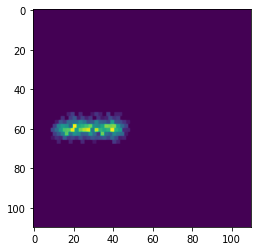

In [60]:
plt.imshow(out_dict['image_mask'][0])

In [61]:
%%time
for key in out_dict.keys():
    if key in h5_out.keys():
        del h5_out[key]
    h5_out[key] = out_dict[key]

CPU times: user 6.22 ms, sys: 1.43 s, total: 1.43 s
Wall time: 1.42 s


In [62]:
h5_out['true_energy'][()][:100]

array([1.40757385e+02, 1.40757385e+02, 2.87870150e-02, 5.58162630e-01,
       3.02335247e-02, 1.66013412e+01, 1.49463439e+00, 6.93911970e-01,
       6.93911970e-01, 6.93911970e-01, 9.28349718e-02, 9.28349718e-02,
       3.79442120e+00, 3.83764833e-01, 1.67161226e+00, 9.94962379e-02,
       2.90383196e+00, 5.32133691e-02, 4.72784698e-01, 3.61163216e+01,
       2.57008784e-02, 2.20144372e-02, 2.70452589e-01, 1.96689852e-02,
       7.24231154e-02, 2.68539786e-01, 1.87846180e-02, 3.46398875e-02,
       1.19818002e-02, 1.23785846e-02, 4.15950924e-01, 5.76941855e-02,
       3.90592515e-02, 2.94412095e-02, 7.76321769e-01, 7.25964069e-01,
       1.01674929e-01, 8.89213849e-03, 1.17940903e-01, 1.28260314e+00,
       1.82232112e-01, 2.11401030e-01, 1.76248197e-02, 2.03840081e-02,
       3.05291582e-02, 2.34272927e-01, 1.32695571e-01, 1.57490537e-01,
       4.53020968e-02, 5.02029173e-02, 5.26831245e+01, 2.69371009e+00,
       2.88503289e-01, 1.12906560e-01, 3.13664484e+00, 3.13664484e+00,
      

In [63]:
h5_out.close()

In [64]:
h5_test = h5py.File(fn_out, 'r')

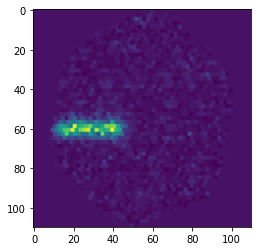

In [65]:
plt.imshow(h5_test['image'][0])

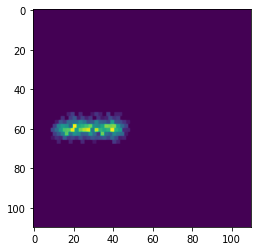

In [66]:
plt.imshow(h5_test['image_mask'][0])

In [67]:
h5_test['true_energy'][:10]

array([1.40757385e+02, 1.40757385e+02, 2.87870150e-02, 5.58162630e-01,
       3.02335247e-02, 1.66013412e+01, 1.49463439e+00, 6.93911970e-01,
       6.93911970e-01, 6.93911970e-01])

In [68]:
fn_out

'/home/saturn/caph/mpp228/CTA_data/Prod5_GRID/Prod5_square_images/gamma-diffuse_images.h5'